# 3. Dimensionality Reduction & Clustering of Portfolio Risk Features

This notebook focuses on reducing the dimensionality of the engineered features and identifying structure in the form of clusters among assets. This helps reveal patterns and similarities between assets based on their risk-return characteristics.

Why PCA?

Principal Component Analysis (PCA) is a linear technique used to project high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

It allows us to:

- Visualize high-dimensional data in 2D or 3D.

- Identify the directions (principal components) that capture the most variability.

- Understand feature influence via loadings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
summary_df_sp500 = pd.read_pickle("../data/processed/sp500_summary.pkl")
summary_df_ftse100 = pd.read_pickle("../data/processed/ftse100_summary.pkl")

In [3]:
summary_df_sp500.head()

,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio
AAPL,0.5336,0.0199,-0.3518,-0.1123,5.3572,0.7825
AMZN,0.4474,0.0227,-0.6189,-0.1335,4.0688,0.4672
CAT,0.4393,0.0205,-0.4017,-0.3349,5.0060,0.6094
GOOGL,0.5119,0.0205,-0.4795,-0.2285,3.7270,0.6294
JNJ,0.3829,0.0124,-0.2902,0.2490,8.0422,0.1323


In [4]:
summary_df_ftse100.head()

,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio
AZN_L,0.2888,0.0158,-0.2868,-0.3794,4.2318,0.2496
BP_L,0.4768,0.0231,-0.6670,-0.2967,13.1480,-0.1084
HSBA_L,0.4389,0.0181,-0.5512,-0.2237,4.3711,0.1943
LLOY_L,0.4340,0.0214,-0.6590,-0.3453,5.3922,-0.0878
NG_L,0.3374,0.0145,-0.3583,-0.9845,9.5565,0.0017


## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_sp500 = scaler.fit_transform(summary_df_sp500)
scaled_features_ftse100 = scaler.fit_transform(summary_df_ftse100)

## PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca_components_sp500 = pca.fit_transform(scaled_features_sp500)
pca_components_ftse100 = pca.fit_transform(scaled_features_ftse100)

In [7]:
pca_components_sp500

array([[-0.22463259,  1.88012514,  0.88417763, -0.51373253,  0.22994136,
         0.01478181],
       [ 0.80813437, -0.39531937, -0.07073669, -0.38190264, -0.77426847,
        -0.04011371],
       [ 0.18323605,  0.67679631, -0.78845318, -0.42610175,  0.7223588 ,
        -0.14627047],
       [ 0.46590245,  1.26061172, -0.08998174, -0.6219711 , -0.41947103,
         0.09926633],
       [-2.82477469, -1.91615699,  0.87839061, -0.96283163,  0.18608152,
         0.10579746],
       [-1.6455217 , -0.28371696,  0.94190383,  1.75285597, -0.10323275,
        -0.09988438],
       [-0.47279223,  1.91797547, -0.03119272,  0.51026278, -0.06864225,
         0.03222988],
       [-0.61381416, -0.6827334 , -2.07038317,  0.66665279,  0.08543023,
         0.16395488],
       [ 3.82355197, -1.24316241,  0.90717312,  0.41763786,  0.31454556,
         0.09980386],
       [ 0.50071054, -1.21441952, -0.56089769, -0.44086974, -0.17274296,
        -0.22956567]])

In [8]:
pca_components_ftse100

array([[ 2.61614546,  0.02276232, -0.49964255, -0.84224477,  0.32159718,
        -0.29128636],
       [-2.42455797,  0.89607029, -0.09122277,  0.61217194,  0.32396194,
         0.0391315 ],
       [ 0.12626406,  0.46393805,  0.58910057, -1.12089921, -0.75935445,
         0.14786147],
       [-1.21405676, -0.32635911,  0.72489512, -0.68490106,  0.02801739,
        -0.26628924],
       [ 1.12819626, -0.76243512, -2.09086383,  0.20306148, -0.11696156,
         0.17407393],
       [ 0.61974386,  0.16448519,  0.82763602, -0.62724458,  0.57324998,
         0.34995485],
       [-2.19322957,  1.10674977, -0.9496282 ,  0.16477566, -0.1154088 ,
        -0.0934773 ],
       [ 2.55710502,  0.77958029,  0.91864868,  1.67224307, -0.18886169,
        -0.04671002],
       [-1.21561036, -2.34479167,  0.57107696,  0.62303746, -0.06623999,
        -0.01325882]])

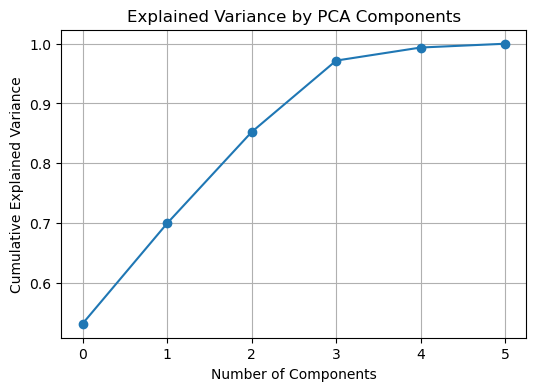

In [9]:
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

## SP500 PCA

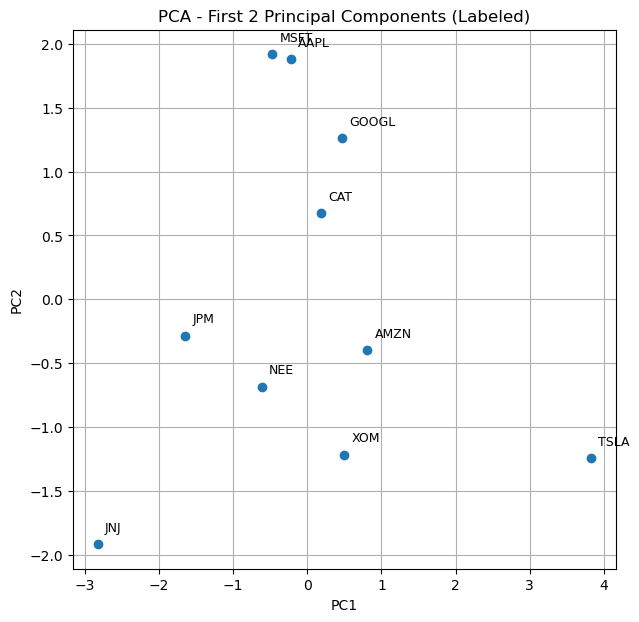

In [10]:
# Extract PCA coordinates
x = pca_components_sp500[:, 0]
y = pca_components_sp500[:, 1]

# Get tickers (row index of summary_df)
tickers = summary_df_sp500.index.tolist()

# Plot points
plt.figure(figsize=(7, 7))
plt.scatter(x, y)

# Add labels
for i, ticker in enumerate(tickers):
    plt.text(x[i] + 0.1, y[i] + 0.1, ticker, fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Principal Components (Labeled)")
plt.grid(True)
plt.show()

In [11]:
loadings_sp500 = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(summary_df_sp500.columns))],
                        index=summary_df_sp500.columns)

print(loadings_sp500)

                      PC1       PC2       PC3       PC4       PC5       PC6
Avg Correlation -0.528839  0.187554  0.135772 -0.162827 -0.366536  0.711237
Volatility      -0.493901  0.229204  0.127441 -0.335965  0.743781 -0.145615
Max Drawdown     0.534063  0.086744 -0.196750 -0.013245  0.484550  0.658466
Skewness         0.205336  0.426494  0.795043  0.377318  0.038042 -0.005573
Kurtosis        -0.265571  0.459225 -0.503067  0.678092  0.068345 -0.032070
Sharpe Ratio     0.280137  0.715528 -0.203580 -0.508195 -0.267460 -0.195706


| Feature           | PC1 (SP500)             | Insight                                                                      |
| ----------------- | ----------------------- | ---------------------------------------------------------------------------- |
| Avg Correlation   | Strong negative loading | Assets with higher average correlation pull in the opposite direction of PC1 |
| Volatility        | Negative loading        | Volatility helps define PC1 alongside correlation                            |
| Max Drawdown      | Positive                | Drawdowns push points further along PC1                                      |
| Skewness/Kurtosis | Mixed                   | Contribute mainly to PC2 and PC3                                             |
| Sharpe Ratio      | Positive on PC2         | Reflects performance rather than risk behavior                               |


Interpretation:

- PC1 can be interpreted as a risk axis (drawdown vs. correlation/volatility).

- PC2 captures performance characteristics (Sharpe, Skewness, etc.).

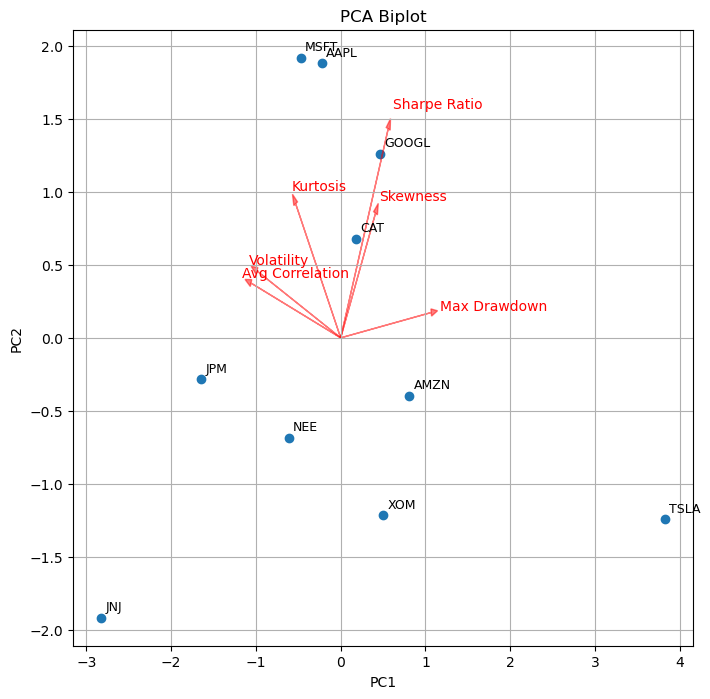

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y)

for i, ticker in enumerate(tickers):
    plt.text(x[i] + 0.05, y[i] + 0.05, ticker, fontsize=9)

# Overlay loadings (scaled for visibility)
for i, feature in enumerate(summary_df_sp500.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i] * 2, 
              pca.components_[1, i] * 2, 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i] * 2.2, 
             pca.components_[1, i] * 2.2, 
             feature, color='red')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")
plt.grid(True)
plt.show()

PCA Biplot (SP500)

The biplot shows:

- The direction of each feature (arrow).

- Where each stock lands in reduced space.

- Clustering tendencies (e.g., MSFT and AAPL being close = similar behavior).

Note:

- Assets in the direction of a feature vector have stronger values for that feature.

- Orthogonality implies feature independence.

## FTSE100 PCA

We're using the same linear dimensionality reduction technique as before — Principal Component Analysis — now on the FTSE 100 feature dataset. This allows us to:

- Detect underlying risk-return structure across international stocks.

- Compare principal components between indices (SP500 vs FTSE100).

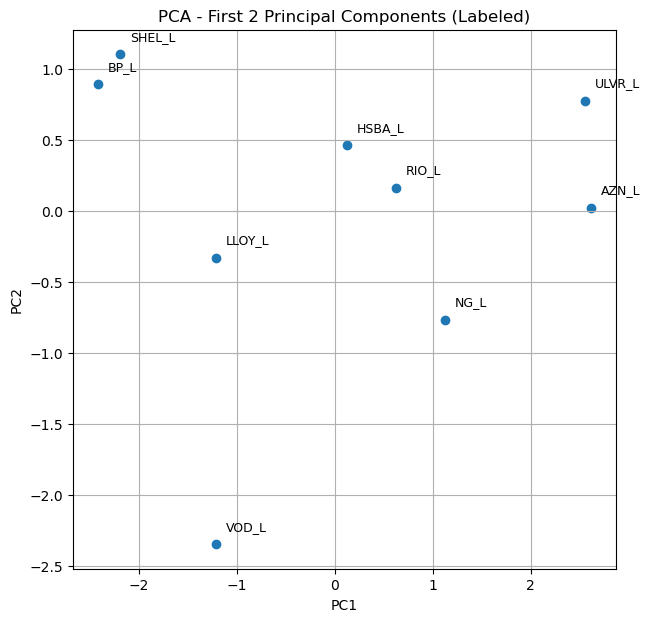

In [13]:
# Extract PCA coordinates
x = pca_components_ftse100[:, 0]
y = pca_components_ftse100[:, 1]

# Get tickers (row index of summary_df)
tickers = summary_df_ftse100.index.tolist()

# Plot points
plt.figure(figsize=(7, 7))
plt.scatter(x, y)

# Add labels
for i, ticker in enumerate(tickers):
    plt.text(x[i] + 0.1, y[i] + 0.1, ticker, fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Principal Components (Labeled)")
plt.grid(True)
plt.show()

In [14]:
loadings_ftse100 = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(summary_df_ftse100.columns))],
                        index=summary_df_ftse100.columns)

print(loadings_ftse100)

                      PC1       PC2       PC3       PC4       PC5       PC6
Avg Correlation -0.528839  0.187554  0.135772 -0.162827 -0.366536  0.711237
Volatility      -0.493901  0.229204  0.127441 -0.335965  0.743781 -0.145615
Max Drawdown     0.534063  0.086744 -0.196750 -0.013245  0.484550  0.658466
Skewness         0.205336  0.426494  0.795043  0.377318  0.038042 -0.005573
Kurtosis        -0.265571  0.459225 -0.503067  0.678092  0.068345 -0.032070
Sharpe Ratio     0.280137  0.715528 -0.203580 -0.508195 -0.267460 -0.195706


Just like in the SP500 case:

- PC1 likely loads heavily on volatility, drawdowns, and correlation.

- PC2 highlights Sharpe ratio and higher-moment distribution traits (skewness, kurtosis).

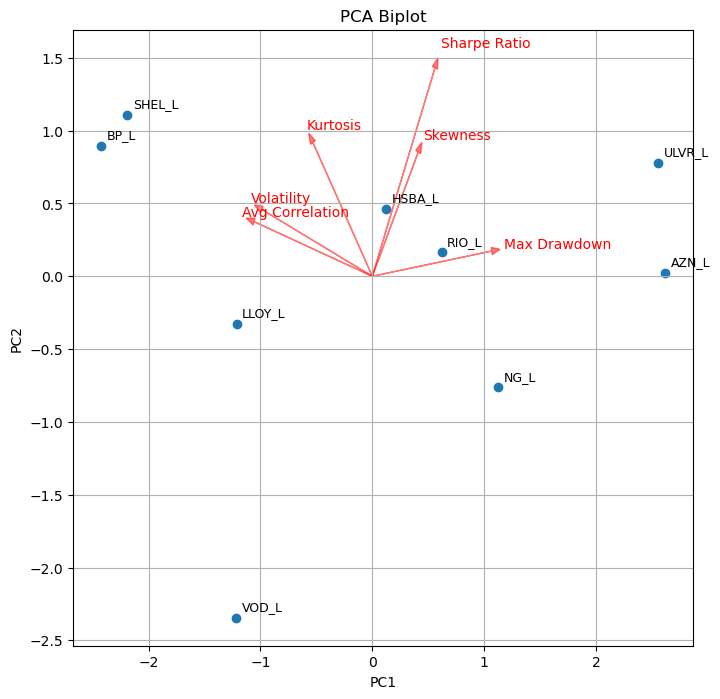

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y)

for i, ticker in enumerate(tickers):
    plt.text(x[i] + 0.05, y[i] + 0.05, ticker, fontsize=9)

# Overlay loadings (scaled for visibility)
for i, feature in enumerate(summary_df_ftse100.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i] * 2, 
              pca.components_[1, i] * 2, 
              color='red', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i] * 2.2, 
             pca.components_[1, i] * 2.2, 
             feature, color='red')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")
plt.grid(True)
plt.show()

## UMAP

In [16]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
umap_embedding_sp500 = umap_model.fit_transform(scaled_features_sp500)

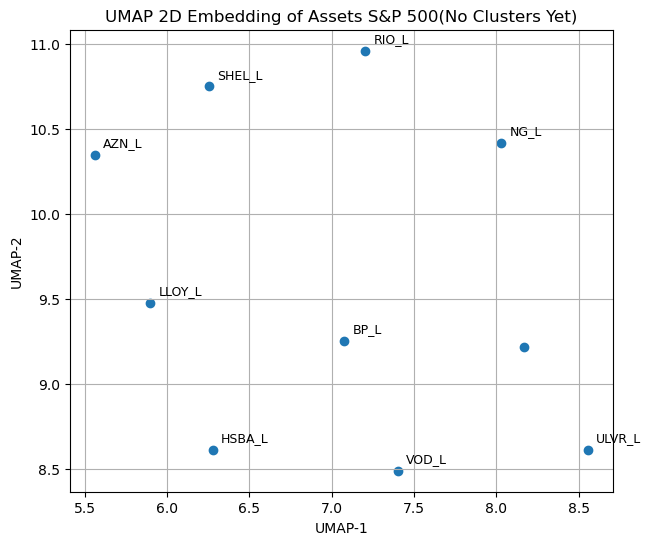

In [17]:
tickers_sp500 = summary_df_sp500.index.tolist()
x_sp500 = umap_embedding_sp500[:, 0]
y_sp500 = umap_embedding_sp500[:, 1]

plt.figure(figsize=(7, 6))
plt.scatter(x_sp500, y_sp500)

for i, ticker in enumerate(tickers):
    plt.text(x_sp500[i] + 0.05, y_sp500[i] + 0.05, ticker, fontsize=9)

plt.title("UMAP 2D Embedding of Assets S&P 500(No Clusters Yet)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

In [18]:
umap_embedding_ftse100 = umap_model.fit_transform(scaled_features_ftse100)

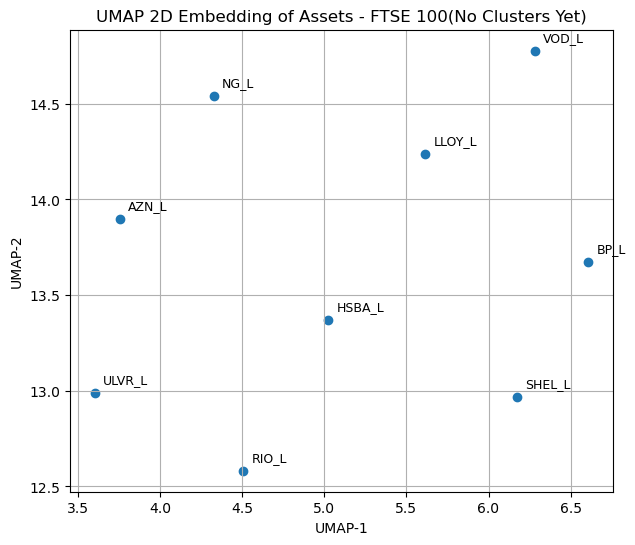

In [19]:
tickers_ftse100 = summary_df_ftse100.index.tolist()
x_ftse = umap_embedding_ftse100[:, 0]
y_ftse = umap_embedding_ftse100[:, 1]

plt.figure(figsize=(7, 6))
plt.scatter(x_ftse, y_ftse)

for i, ticker in enumerate(tickers):
    plt.text(x_ftse[i] + 0.05, y_ftse[i] + 0.05, ticker, fontsize=9)

plt.title("UMAP 2D Embedding of Assets - FTSE 100(No Clusters Yet)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

In [20]:
import hdbscan

In [21]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
cluster_labels_sp500 = clusterer.fit_predict(umap_embedding_sp500)

In [22]:
cluster_labels_sp500

array([2, 1, 2, 2, 2, 2, 2, 0, 1, 0])

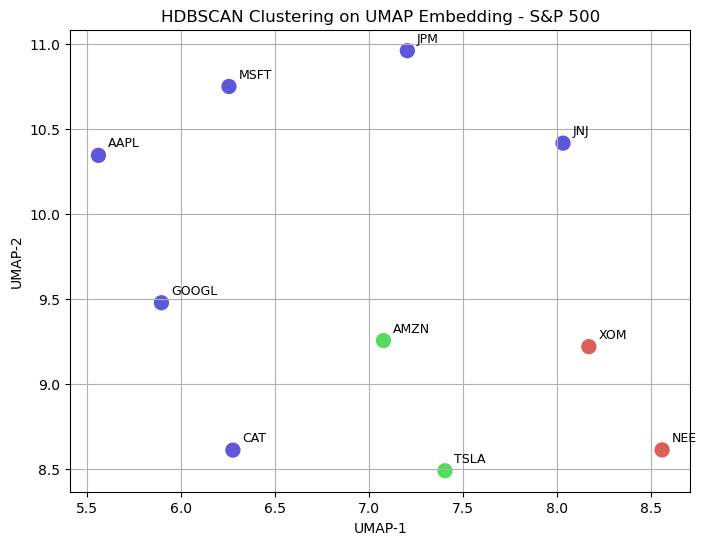

In [23]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('hls', len(set(cluster_labels_sp500)) - (1 if -1 in cluster_labels_sp500 else 0))
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in cluster_labels_sp500]

plt.scatter(x_sp500, y_sp500, c=colors, s=100)

# Add ticker labels
for i, ticker in enumerate(tickers_sp500):
    plt.text(x_sp500[i] + 0.05, y_sp500[i] + 0.05, ticker, fontsize=9)

plt.title("HDBSCAN Clustering on UMAP Embedding - S&P 500")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

In [24]:
df_clusters_sp500 = pd.DataFrame({
    "Ticker": tickers_sp500,
    "Cluster": cluster_labels_sp500,
    "UMAP-1": x_sp500,
    "UMAP-2": y_sp500
}).set_index("Ticker")

df_clusters_sp500 = df_clusters_sp500.join(summary_df_sp500)

In [25]:
cluster_summary_sp500 = df_clusters_sp500.groupby("Cluster").mean().round(3)
display(cluster_summary_sp500)

,UMAP-1,UMAP-2,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio
Cluster,,,,,,,,
0,8.363,8.917,0.395,0.020,-0.537,-0.305,6.223,0.291
1,7.240,8.873,0.412,0.032,-0.709,-0.123,3.645,0.629
2,6.538,10.095,0.482,0.019,-0.399,-0.118,7.027,0.539


In [26]:
outliers = df_clusters_sp500[df_clusters_sp500["Cluster"] == -1]

Cluster Visualization (UMAP + HDBSCAN)

S&P 500:

- 3 clusters + 1 outlier (JNJ).

- TSLA is far right in UMAP – indicates very unique risk/return behavior (high Sharpe + high volatility).

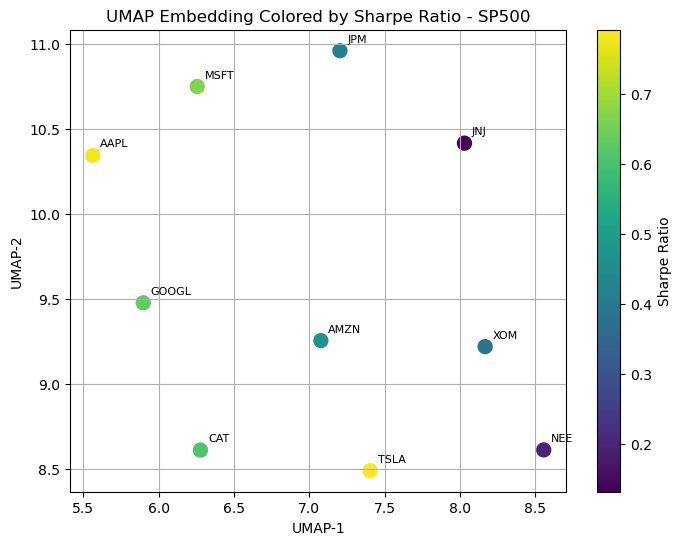

In [27]:
plt.figure(figsize=(8,6))
sc_sp500 = plt.scatter(x_sp500, y_sp500, c=summary_df_sp500["Sharpe Ratio"], cmap="viridis", s=100)
plt.colorbar(sc_sp500, label="Sharpe Ratio")
plt.title("UMAP Embedding Colored by Sharpe Ratio - SP500")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

for i, ticker in enumerate(tickers_sp500):
    plt.text(x_sp500[i] + 0.05, y_sp500[i] + 0.05, ticker, fontsize=8)

plt.grid(True)
plt.show()

📊 Cluster Profiles

SP500 Cluster Heatmap:

- One cluster with high Sharpe but also higher volatility (growth-oriented).

- Another more stable but lower performing (defensive).

- Outlier cluster often includes stocks with extreme values (like TSLA or JNJ).

SP500 Outliers:

- TSLA, AAPL – higher performance

- NEE – lower

- JPM – unusually central but still tagged

In [28]:
cluster_labels_ftse100 = clusterer.fit_predict(umap_embedding_ftse100)

In [29]:
cluster_labels_ftse100

array([2, 0, 3, 1, 2, 3, 0, 2, 1])

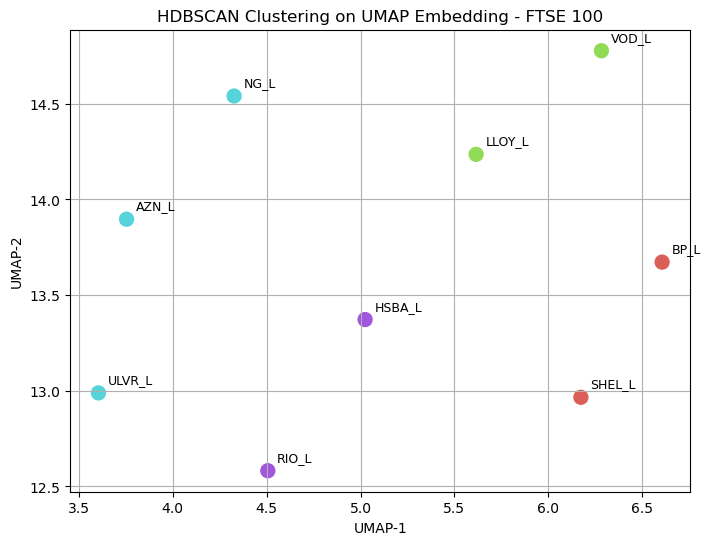

In [30]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('hls', len(set(cluster_labels_ftse100)) - (1 if -1 in cluster_labels_ftse100 else 0))
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in cluster_labels_ftse100]

plt.scatter(x_ftse, y_ftse, c=colors, s=100)

# Add ticker labels
for i, ticker in enumerate(tickers_ftse100):
    plt.text(x_ftse[i] + 0.05, y_ftse[i] + 0.05, ticker, fontsize=9)

plt.title("HDBSCAN Clustering on UMAP Embedding - FTSE 100")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

In [31]:
df_clusters_ftse100 = pd.DataFrame({
    "Ticker": tickers_ftse100,
    "Cluster": cluster_labels_ftse100,
    "UMAP-1": x_ftse,
    "UMAP-2": y_ftse
}).set_index("Ticker")

df_clusters_ftse100 = df_clusters_ftse100.join(summary_df_ftse100)

In [32]:
cluster_summary_ftse100 = df_clusters_ftse100.groupby("Cluster").mean().round(3)
display(cluster_summary_ftse100)

,UMAP-1,UMAP-2,Avg Correlation,Volatility,Max Drawdown,Skewness,Kurtosis,Sharpe Ratio
Cluster,,,,,,,,
0,6.390,13.319,0.475,0.023,-0.666,-0.441,13.393,-0.027
1,5.949,14.506,0.421,0.020,-0.662,-0.443,5.433,-0.312
2,3.895,13.809,0.312,0.014,-0.329,-0.269,7.560,0.099
3,4.765,12.977,0.416,0.019,-0.478,-0.145,4.426,0.112


In [33]:
outliers = df_clusters_ftse100[df_clusters_ftse100["Cluster"] == -1]

FTSE 100:

- Similar separation; oil stocks like SHEL_L, BP_L form a distinct cluster.

- AZN_L and VOD_L are anomalous in their behavior.

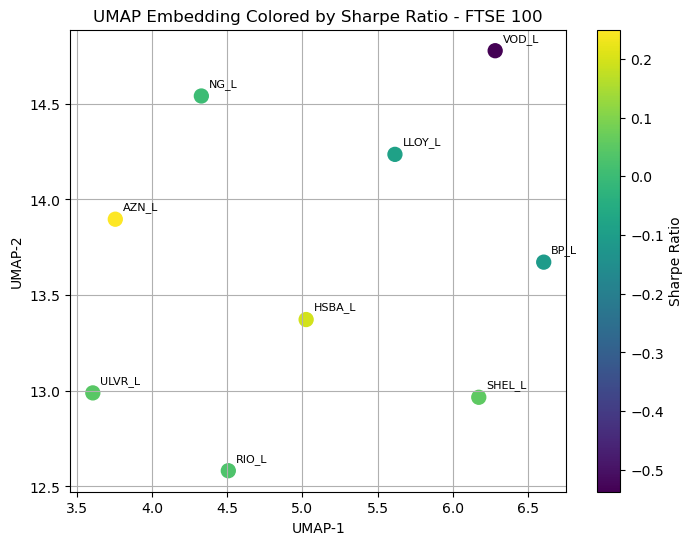

In [34]:
plt.figure(figsize=(8,6))
sc_ftse100 = plt.scatter(x_ftse, y_ftse, c=summary_df_ftse100["Sharpe Ratio"], cmap="viridis", s=100)
plt.colorbar(sc_ftse100, label="Sharpe Ratio")
plt.title("UMAP Embedding Colored by Sharpe Ratio - FTSE 100")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

for i, ticker in enumerate(tickers_ftse100):
    plt.text(x_ftse[i] + 0.05, y_ftse[i] + 0.05, ticker, fontsize=8)

plt.grid(True)
plt.show()

FTSE100 Cluster Heatmap:

- Similar structure, though less dramatic differences.

- VOD_L stands out due to very high Sharpe.

FTSE100 Outliers:

- VOD_L: Best Sharpe

- AZN_L, HSBA_L – consistent but deviating from cluster average

In [35]:
df_clusters_sp500.to_pickle("../data/processed/df_clusters_sp500.pkl")
cluster_summary_sp500.to_pickle("../data/processed/cluster_summary_sp500.pkl")

df_clusters_ftse100.to_pickle("../data/processed/df_clusters_ftse100.pkl")
cluster_summary_ftse100.to_pickle("../data/processed/cluster_summary_ftse100.pkl")

## Summary of Methods Used

| Method         | Why We Use It                                               |
| -------------- | ----------------------------------------------------------- |
| PCA            | Understand directions of variance; feature contribution     |
| UMAP           | Capture non-linear structure; visualize clusters            |
| KMeans         | Quick baseline clustering                                   |
| DBSCAN         | Detects density-based structures; handles noise             |
| HDBSCAN        | Most robust to financial noise; detects cluster hierarchy   |
| Sharpe Z-Score | Tagging anomalies in cluster based on performance deviation |
